<a href="https://colab.research.google.com/github/TSarkar2000/Face_mask_detection/blob/main/face_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/Colab Notebooks/datasets/Final_Assignment_Face Mask Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Train/WithoutMask/1858.png  
  inflating: Train/WithoutMask/1859.png  
  inflating: Train/WithoutMask/1860.png  
  inflating: Train/WithoutMask/1861.png  
  inflating: Train/WithoutMask/1862.png  
  inflating: Train/WithoutMask/1863.png  
  inflating: Train/WithoutMask/1864.png  
  inflating: Train/WithoutMask/1865.png  
  inflating: Train/WithoutMask/1866.png  
  inflating: Train/WithoutMask/1867.png  
  inflating: Train/WithoutMask/1868.png  
  inflating: Train/WithoutMask/1869.png  
  inflating: Train/WithoutMask/1870.png  
  inflating: Train/WithoutMask/1871.png  
  inflating: Train/WithoutMask/1872.png  
  inflating: Train/WithoutMask/1873.png  
  inflating: Train/WithoutMask/1874.png  
  inflating: Train/WithoutMask/1875.png  
  inflating: Train/WithoutMask/1876.png  
  inflating: Train/WithoutMask/1877.png  
  inflating: Train/WithoutMask/1878.png  
  inflating: Train/WithoutMask/1879.png  
  inflating: Train/Withou

In [4]:
import os

print(f"train/mask = {len(os.listdir('Train/WithMask'))}")
print(f"train/withoutMask = {len(os.listdir('Train/WithoutMask'))}")
print(f"validation/mask = {len(os.listdir('Validation/WithMask'))}")
print(f"validation/withoutMask = {len(os.listdir('Validation/WithoutMask'))}")
print(f"test/mask = {len(os.listdir('Test/WithMask'))}")
print(f"test/withoutMask = {len(os.listdir('Test/WithoutMask'))}")

train/mask = 5000
train/withoutMask = 5000
validation/mask = 400
validation/withoutMask = 400
test/mask = 483
test/withoutMask = 509


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

train_gen = ImageDataGenerator(rescale=1. / 255,
                               rotation_range=40,
                               width_shift_range=.2,
                               height_shift_range=.2,
                               shear_range=.2,
                               zoom_range=.2,
                               horizontal_flip=True,
                               vertical_flip=True)

train_generator = train_gen.flow_from_directory('Train',
                                                target_size=(128, 128),
                                                batch_size=32,
                                                class_mode='binary')

validation_gen = ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_gen.flow_from_directory('Validation',
                                                          target_size=(128, 128),
                                                          batch_size=32,
                                                          class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


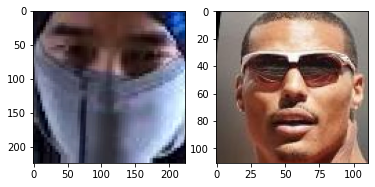

In [8]:
import random
import matplotlib.pyplot as plt

img = load_img('Train/WithMask/'+random.choice(os.listdir('Train/WithMask')))
img2 = load_img('Train/WithoutMask/'+random.choice(os.listdir('Train/WithoutMask')))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img2)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import VGG19

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.25))

model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.25))

model.add(Conv2D(128, kernel_size=(3, 3), strides=1, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=.001, momentum=.9),
              metrics=['acc'])

In [14]:
checkpoint = ModelCheckpoint('model-{epoch:02d}-{val_acc:.2f}.h5')
earlyStopping = EarlyStopping(patience=7)
reduceLRonPlateau = ReduceLROnPlateau(min_lr=.00001, patience=2, factor=.5, verbose=1)

In [15]:
history = model.fit(train_generator,
          epochs=30,
          validation_data=validation_generator,
          callbacks=[checkpoint, earlyStopping, reduceLRonPlateau])

Epoch 1/30
313/313 [==============================] - 77s 144ms/step - loss: 2.8399 - acc: 0.7688 - val_loss: 0.4344 - val_acc: 0.8512
Epoch 2/30
313/313 [==============================] - 45s 143ms/step - loss: 0.5384 - acc: 0.7860 - val_loss: 0.4791 - val_acc: 0.8650
Epoch 3/30
313/313 [==============================] - 45s 143ms/step - loss: 0.5477 - acc: 0.7824 - val_loss: 1.1525 - val_acc: 0.7525

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/30
313/313 [==============================] - 45s 143ms/step - loss: 0.4332 - acc: 0.8345 - val_loss: 0.2397 - val_acc: 0.9050
Epoch 5/30
313/313 [==============================] - 45s 143ms/step - loss: 0.4035 - acc: 0.8508 - val_loss: 0.2624 - val_acc: 0.9212
Epoch 6/30
313/313 [==============================] - 45s 143ms/step - loss: 0.3978 - acc: 0.8493 - val_loss: 0.6049 - val_acc: 0.8600

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 7/30
313/313 [========

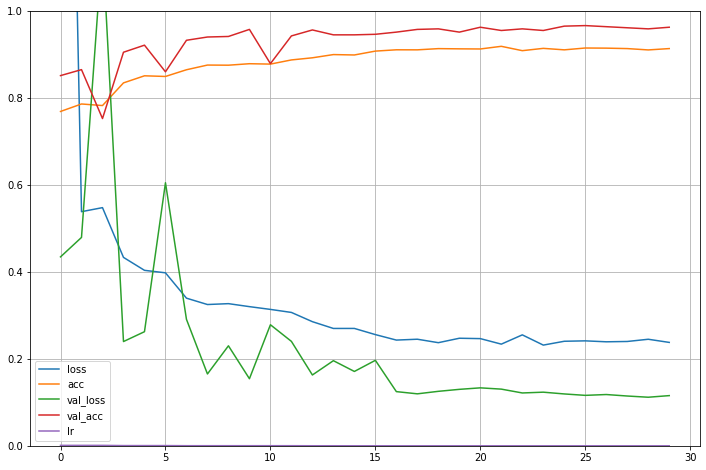

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
modelB = Sequential()

conv = VGG19(include_top=False,
                 input_shape=(128, 128, 3))
modelB.add(conv)

modelB.add(Flatten())
modelB.add(Dense(256, activation='relu'))
modelB.add(Dropout(.5))
modelB.add(Dense(1, activation='sigmoid'))

In [ ]:
conv.trainable = False

In [ ]:
modelB.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
modelB.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=.001, momentum=.9),
              metrics=['acc'])

In [ ]:
checkpoint2 = ModelCheckpoint('modelB2-{epoch:02d}-{val_acc:.3f}.h5')

historyB = modelB.fit(train_generator,
          epochs=30,
          validation_data=validation_generator,
          callbacks=[checkpoint2, earlyStopping, reduceLRonPlateau])

Epoch 1/30
313/313 [==============================] - 49s 154ms/step - loss: 1.3778 - acc: 0.7832 - val_loss: 0.1222 - val_acc: 0.9500
Epoch 2/30
313/313 [==============================] - 48s 153ms/step - loss: 0.3373 - acc: 0.8667 - val_loss: 0.0970 - val_acc: 0.9613
Epoch 3/30
313/313 [==============================] - 48s 153ms/step - loss: 0.2949 - acc: 0.8860 - val_loss: 0.0957 - val_acc: 0.9600
Epoch 4/30
313/313 [==============================] - 48s 153ms/step - loss: 0.3012 - acc: 0.9005 - val_loss: 0.0895 - val_acc: 0.9700
Epoch 5/30
313/313 [==============================] - 48s 152ms/step - loss: 0.2714 - acc: 0.9007 - val_loss: 0.0839 - val_acc: 0.9613
Epoch 6/30
313/313 [==============================] - 48s 153ms/step - loss: 0.2702 - acc: 0.8956 - val_loss: 0.0758 - val_acc: 0.9688
Epoch 7/30
313/313 [==============================] - 48s 153ms/step - loss: 0.2357 - acc: 0.9045 - val_loss: 0.0882 - val_acc: 0.9588
Epoch 8/30
313/313 [==============================] - 4

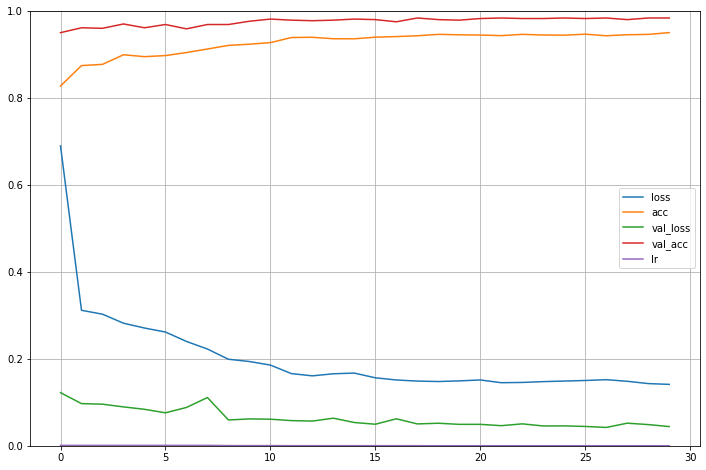

In [ ]:
pd.DataFrame(historyB.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
test_generator = validation_gen.flow_from_directory('Test',
                                                          target_size=(128, 128),
                                                          batch_size=32,
                                                          class_mode='binary')

Found 992 images belonging to 2 classes.


In [18]:
model.evaluate(test_generator)

31/31 [==============================] - 1s 42ms/step - loss: 0.1426 - acc: 0.9617


[0.1426072120666504, 0.961693525314331]

In [ ]:
modelB.evaluate(test_generator)

31/31 [==============================] - 2s 48ms/step - loss: 0.0468 - acc: 0.9849


[0.04683218151330948, 0.9848790168762207]

In [ ]:
from tensorflow.keras.models import load_model

modelX = load_model('/content/modelB2-27-0.984.h5')

In [ ]:
modelX.evaluate(test_generator)

31/31 [==============================] - 2s 48ms/step - loss: 0.0475 - acc: 0.9859


[0.047487661242485046, 0.9858871102333069]